# LoanTap Case Study - Creditworthiness Underwriting Model

---

## 🏢 Business Context

LoanTap is an online platform focused on providing **customized loan products to millennials**. The company aims to innovate in a traditionally dull segment by offering **instant, flexible loans** to salaried professionals and business owners.

LoanTap's data science team is building an **underwriting model** to determine the **creditworthiness of MSMEs and individuals**.

This case study will specifically focus on **Personal Loan underwriting**: Personal loan underwriting is the process where lenders assess the risk of lending money to a borrower by evaluating their creditworthiness, financial stability, and ability to repay the loan.

---

## 📌 Problem Statement

Given a set of attributes for an individual:
- **Should a credit line be extended to them?**
- If yes, **what should the repayment terms be in business recommendations?**

---

## 💼 Financial Instruments by LoanTap

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

*This case study focuses only on the **Personal Loan** product.*

---

## 📊 Dataset: `LoanTapData.csv`

### 🔑 Data Dictionary

| Column Name            | Description |
|------------------------|-------------|
| loan_amnt              | Listed amount of the loan applied for |
| term                   | Loan repayment period (in months - 36 or 60) |
| int_rate               | Interest Rate on the loan |
| installment            | Monthly installment if the loan is granted |
| grade, sub_grade       | LoanTap assigned loan grades |
| emp_title              | Job title of the borrower |
| emp_length             | Employment length (0–10 years) |
| home_ownership         | Home ownership status |
| annual_inc             | Annual income (self-reported) |
| verification_status    | Verification status of income |
| issue_d                | Month when loan was funded |
| loan_status            | Current status of the loan (**Target variable**) |
| purpose, title         | Reason/title of the loan |
| dti                    | Debt-to-Income ratio |
| earliest_cr_line       | Date of first credit line |
| open_acc               | Number of open credit lines |
| pub_rec                | Derogatory public records |
| revol_bal              | Revolving balance |
| revol_util             | Revolving utilization rate |
| total_acc              | Total number of credit lines |
| initial_list_status    | Initial listing status (W or F) |
| application_type       | Individual or joint application |
| mort_acc               | Number of mortgage accounts |
| pub_rec_bankruptcies   | Number of bankruptcies |
| address                | Borrower’s address |

---

## 🧠 Concepts Used

- Exploratory Data Analysis
- Feature Engineering
- Logistic Regression
- Precision vs Recall Tradeoff

## ✅ What Does ‘Good’ Look Like?

1. **Import the dataset and perform EDA**
2. **Explore how `loan_status` (target variable) is influenced by predictors**
3. **Check correlations**
4. **Feature Engineering**: Create flags for:
   - `pub_rec`
   - `mort_acc`
   - `pub_rec_bankruptcies`
5. **Handle Missing Values & Outliers**
6. **Scaling** using `MinMaxScaler` or `StandardScaler`
7. **Model Building** with `LogisticRegression`
8. **Evaluation**:
   - Classification Report
   - ROC AUC Curve
   - Precision Recall Curve

---

## 🧮 Evaluation Criteria (Total: 100 Points)

### 🔍 EDA (10 points)
- Shape, data types, missing values, summary statistics
- Categorical → Category
- Univariate & Bivariate Analysis (Distribution, Box, Count, Heatmap)
- Insights, outliers, variable relationships

### 🔧 Data Preprocessing (20 points)
- Remove duplicates
- Missing value treatment
- Outlier handling
- Feature engineering
- Final dataset for modeling

### 🧱 Model Building (10 points)
- Logistic Regression
- Model coefficients with column names
- Model interpretation

### 📊 Results Evaluation (50 points)
- ROC AUC Curve (10)
- Precision Recall Curve (10)
- Classification Report (10)
- Tradeoff Questions (10+10):
  - How to reduce false positives
  - Why NPA risk makes false negatives dangerous

### 💡 Actionable Recommendations (10 points)

---

## 📋 Questionnaire (Answer in Markdown/Text Cell)

1. What percentage of customers have fully paid their Loan Amount?
2. Comment about the correlation between `loan_amnt` and `installment`.
3. The majority of people have home ownership as _______.
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
5. Name the top 2 afforded job titles.
6. Thinking from a bank’s perspective, which metric should our primary focus be on?
   - ROC AUC
   - Precision
   - Recall
   - F1 Score
7. How does the gap in precision and recall affect the bank?
8. Which were the features that heavily affected the outcome?
9. Will the results be affected by geographical location? (Yes/No)

---

## 💬 Discussion Forum

[Click here to discuss on Scaler Forum](https://www.scaler.com/academy/mentee-dashboard/discussion-forum/p/ask-me-anything-business-case-loantap/21146)

---


In [3]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
# load the dataset
original_data = pd.read_csv("logistic_regression.csv")

In [5]:
data = original_data.copy(deep= True)
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
print(f"No. of rows in the data: {data.shape[0]}")
print(f"No. of columns in the data: {data.shape[1]}")

No. of rows in the data: 396030
No. of columns in the data: 27


**Working on almost 4 lac rows of user's data, and 27 columns**

In [8]:
data.info() # Basic overview of data - Nulls and object types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

**Dividing num_cols and cat_cols into separate lists for better analysis**

In [9]:
# Null Count
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [180]:
## remove extra spaces and Save original columns in a list

data.columns = data.columns.str.strip()
og_columns = data.columns.to_list()
og_columns

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'address',
 'emp_length_clean',
 'emp_level',
 'earliest_cr_line_year',
 'issue_d_year',
 'earliest_cr_line_month',
 'issue_d_month']

In [13]:
def column_summary(data, col, uni_len=13):
    """
    Column Summarizer Utility
    
    Displays key statistics for column in the DataFrame:
    - Column name and data type
    - Null value count and percentage
    - Number of unique values
    - Value counts (if column is categorical or has unique values <= uni_lens)
    - Descriptive statistics for numerical columns
    
    Parameters:
    - data: Pandas DataFrame
    - col: Column name (string)
    - uni_lens: Threshold for displaying value counts (int)
    """
    
    print("##" * 40)
    print(f"🔹 Column Name       : {col}")
    print(f"🔸 Data Type         : {data[col].dtype}")
    
    total_null = data[col].isnull().sum()
    null_percent = (total_null / len(data)) * 100
    print(f"❌ Total Null Values : {total_null} ({null_percent:.2f}%)")
    
    unique_vals = data[col].nunique()
    print(f"🔢 Unique Values     : {unique_vals}")
    
    # Display unique values and value counts if categorical or low cardinality
    if data[col].dtype == 'object' and unique_vals < uni_len:
        print(f"\n📊 Value Counts:\n{data[col].value_counts(dropna=False)}")
        
    
    print("##" * 40 + "\n")

# Apply it to all columns
for col in data.columns:
    column_summary(data, col, uni_len=10)


################################################################################
🔹 Column Name       : loan_amnt
🔸 Data Type         : float64
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 1397
################################################################################

################################################################################
🔹 Column Name       : term
🔸 Data Type         : object
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 2

📊 Value Counts:
term
36 months    302005
60 months     94025
Name: count, dtype: int64
################################################################################

################################################################################
🔹 Column Name       : int_rate
🔸 Data Type         : float64
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 566
################################################################################

#######################################################################

**Let's focus on Categorical Cols first then we will goto numerical columns**
1. There are 4 rows and 15 columns/features
2. emp_title, emp_length having few null values of 5.79% and 6.46% respectively
3. grade has 7 categoies ranging from A to G and subGrade has 35 Unique values
4. **Nulls**: Emp title, mort_acc and emp_length, pub_rec_bankruptcies, title(just a few) have ~5% negative values.
5. House owner ships has values or categories like Other, None, Any - Need more info
6. Verification_status: contains Verified and Source Verified - Is it same or different?
7. loan_status: It will be our target variable whether is he able to pay full loan or not.
8. Loan is taken for 14 different purposes


## Feature Engineering & Descriptive Analysis - EDA

In [16]:
## Extract only numbers from the term

data['term']= data['term'].str.strip()
data['term']= data['term'].str[:2].astype(int)
data['term'].value_counts()

term
36    302005
60     94025
Name: count, dtype: int64

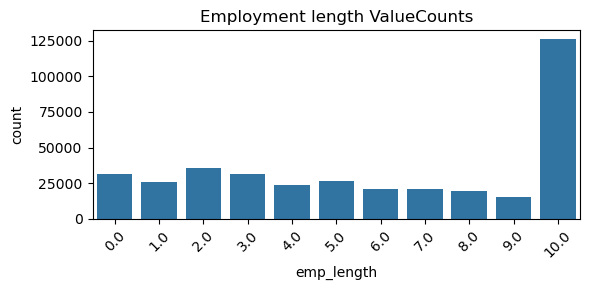

In [97]:
plt.figure(figsize= (6, 3))
plt.title("Employment length ValueCounts")
sns.barplot(data['emp_length'].value_counts())
plt.xticks(rotation= 45)
plt.tight_layout()

**we have data till 10+ years if just take years from them it might get biased towards the 10 year and ignore if people with years more than 10**<br>
**Instead we can create bins and then do the label encoding or target encoding**

In [69]:
## categorizing emp based on their experience

def clean_emp_length(val):
    if pd.isnull(val):
        return np.nan
    if '< 1' in val:
        return 0
    elif '10+' in val:
        return 10
    else:
        return int(val.strip().split()[0])

data['emp_length_clean'] = data['emp_length'].apply(clean_emp_length)

bins = [-1, 0, 1, 5, 9, 10]
labels = ['Fresher', 'Junior', 'Mid', 'Senior', 'Legend']

data['emp_level'] = pd.cut(data['emp_length_clean'], bins=bins, labels=labels, include_lowest=True)


data[['emp_length','emp_lenght_clean', 'emp_level']].head(10)


,emp_length,emp_level
0,10.0,Legend
1,4.0,Mid
2,0.0,Fresher
3,6.0,Senior
4,9.0,Senior
5,10.0,Legend
6,2.0,Mid
7,10.0,Legend
8,10.0,Legend
9,3.0,Mid


In [73]:
data[['emp_length', 'emp_length_clean', 'emp_level']].value_counts()

emp_length  emp_level
10.0        Legend       126041
2.0         Mid           35827
0.0         Fresher       31725
3.0         Mid           31665
5.0         Mid           26495
1.0         Junior        25882
4.0         Mid           23952
6.0         Senior        20841
7.0         Senior        20819
8.0         Senior        19168
9.0         Senior        15314
Name: count, dtype: int64

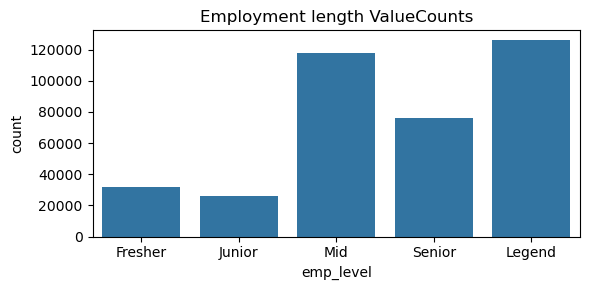

In [85]:
plt.figure(figsize= (6, 3))
plt.title("Employment length ValueCounts")
sns.barplot(data['emp_level'].value_counts())
# plt.xticks(rotation= 45)
plt.tight_layout()

In [107]:
# # Verification status: combime source verified and verified and assign 0 and 1

# data["verification_status"] = data['verification_status'].replace({
#     "Verified": 1,
#     "Source Verified": 1,
#     "Not Verified": 0
# })
# data["verification_status"].astype("category")
# data["verification_status"].value_counts()

verification_status
1    270948
0    125082
Name: count, dtype: int64

In [23]:
# # Loan status - since it is the target var - let's change to binary values

# data['loan_status'] = data['loan_status'].replace({
#     "Fully Paid": 1,
#     "Charged Off" : 0
# })
# data['loan_status'] = data['loan_status'].astype("category")
# data['loan_status'].value_counts()

loan_status
1    318357
0     77673
Name: count, dtype: int64

In [143]:
# Converting issue_d into time data frame
data["issue_d"]= pd.to_datetime(data["issue_d"])
data["earliest_cr_line"]= pd.to_datetime(data["earliest_cr_line"])

data[["issue_d", "earliest_cr_line"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   issue_d           396030 non-null  datetime64[ns]
 1   earliest_cr_line  396030 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 6.0 MB


In [145]:
data[["issue_d", "earliest_cr_line"]].head()

,issue_d,earliest_cr_line
0,2015-01-01,1990-06-01
1,2015-01-01,2004-07-01
2,2015-01-01,2007-08-01
3,2014-11-01,2006-09-01
4,2013-04-01,1999-03-01


In [149]:
data["issue_d_month"] = data["issue_d"].dt.month
data["issue_d_year"] = data["issue_d"].dt.year

data["earliest_cr_line_month"] = data["earliest_cr_line"].dt.month
data["earliest_cr_line_year"] = data["earliest_cr_line"].dt.year


data[["issue_d", "issue_d_month", "issue_d_year", "earliest_cr_line", "earliest_cr_line_month", "earliest_cr_line_year"]].head()

,issue_d,issue_d_month,issue_d_year,earliest_cr_line,earliest_cr_line_month,earliest_cr_line_year
0,2015-01-01,1,2015,1990-06-01,6,1990
1,2015-01-01,1,2015,2004-07-01,7,2004
2,2015-01-01,1,2015,2007-08-01,8,2007
3,2014-11-01,11,2014,2006-09-01,9,2006
4,2013-04-01,4,2013,1999-03-01,3,1999


In [209]:
data['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [231]:
# GETTING JUST THE PIN CODE FROM THE ADDRESS AS TOTAL ADDRESS IS IRRELEVANT

data['pincode']= data['address'].str[-6:].astype("object")
data['pincode'].head()

0     22690
1     05113
2     05113
3     00813
4     11650
Name: pincode, dtype: object

In [243]:
## we can drop the address now

data.drop(["address"],axis= 1, inplace= True)
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'emp_length_clean', 'emp_level',
       'earliest_cr_line_year', 'issue_d_year', 'earliest_cr_line_month',
       'issue_d_month', 'pincode'],
      dtype='object')

In [249]:
data.describe(include= "object" )

,grade,sub_grade,emp_title,home_ownership,purpose,title,initial_list_status,application_type,pincode
count,396030,396030,373103,396030,396030,394274,396030,396030,396030
unique,7,35,173105,6,14,48816,2,3,10
top,B,B3,Teacher,MORTGAGE,debt_consolidation,Debt consolidation,f,INDIVIDUAL,70466
freq,116018,26655,4389,198348,234507,152472,238066,395319,56985


In [24]:
data.describe()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,emp_length_clean
count,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000,377729.000000
mean,14113.888089,41.698053,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648,5.938578
std,8357.441341,10.212038,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174,3.645623
min,500.000000,36.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000,3.000000
50%,12000.000000,36.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000,6.000000
75%,20000.000000,36.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000,10.000000
max,40000.000000,60.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000,10.000000


### **Descriptive Statistics Summary**

#### Loan and Income-Related Features
- **`loan_amnt`** ranges from **₹500 to ₹40,000**, with a **median** of ₹12,000.  
  → Most borrowers request **moderate loan amounts**, indicating conservative borrowing behavior.
- **`annual_inc`** has a **mean of ~₹74K**, but the **maximum is ₹8.7 million**, suggesting the presence of **extreme outliers**.
- **`installment`** is tightly coupled with `loan_amnt` (range: ₹16 to ₹1,534), with a median of ₹375/month.

#### Interest and Debt Metrics
- **`int_rate`** varies from **5.32% to 30.99%**, with a **mean of ~13.6%**, suggesting a **broad risk range** of borrowers.
- **`dti` (Debt-to-Income Ratio)** ranges from 0 to a **very high value of 9999**, which is likely an **invalid or imputed value**.
  - **Median DTI** is around **16.9**, which is within industry-acceptable limits.
  - **Action**: Filter or impute high DTI outliers (above 100 likely invalid).

#### Credit History & Behavior
- **`open_acc`** has a **mean of ~11**, maxing out at 90 open accounts — high but plausible for affluent or heavily leveraged individuals.
- **`total_acc`** (all historical accounts) ranges up to 151, with a median of 24 — showing a **typical credit history depth**.
- **`revol_bal`** (revolving balance) maxes out at **₹1.74 million**, with a **median of ₹11K**, again suggesting outliers.
- **`revol_util`** (credit utilization rate) has a median around **54.8%**, indicating **moderate to high utilization** among borrowers.

#### Public Records & Risk Indicators
- **`pub_rec`** and **`pub_rec_bankruptcies`** are mostly **zero** across the dataset:
  - Mean of `pub_rec` is 0.17; **most people have clean records**.
  - **Max values (86 and 8 respectively)** point to **very risky borrowers** who should be flagged or excluded.
- **`mort_acc`** has a **median of 1**, showing **moderate home loan penetration** in the dataset.

---

### Key Observations
- **Missing Data**: Present in `revol_util`, `mort_acc`, and `pub_rec_bankruptcies` — needs imputation.
- **Outliers Detected**:
  - `annual_inc`, `dti`, `pub_rec`, `revol_bal`, `pub_rec_bankruptcies`
  - Treat these before scaling and modeling.
- **Feature Scaling**: Required due to wide value range in features like `revol_bal`, `loan_amnt`, `annual_inc`, `installment`.
- **Skewed Distribution**: Income and installment-related features likely **right-skewed**, suggesting **log transformation** may help.



## Univariate Analysis - EDA

In [185]:
data.shape

(396030, 33)

In [203]:
data.iloc[:5, :16]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti
0,10000.0,36,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,0,2015-01-01,1,vacation,Vacation,26.24
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,0,2015-01-01,1,debt_consolidation,Debt consolidation,22.05
2,15600.0,36,10.49,506.97,B,B3,Statistician,0.0,RENT,43057.0,1,2015-01-01,1,credit_card,Credit card refinancing,12.79
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,0,2014-11-01,1,credit_card,Credit card refinancing,2.60
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,1,2013-04-01,0,credit_card,Credit Card Refinance,33.95


In [207]:
data.iloc[:5, 16:33]

,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_length_clean,emp_level,earliest_cr_line_year,issue_d_year,earliest_cr_line_month,issue_d_month
0,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10.0,Legend,1990,2015,6,1
1,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4.0,Mid,2004,2015,7,1
2,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0.0,Fresher,2007,2015,8,1
3,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6.0,Senior,2006,2014,9,11
4,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9.0,Senior,1999,2013,3,4


In [167]:
cat_cols = [col for col in data.columns if data[col].dtype == "object" or data[col].nunique() <= 14]
print(len(cat_cols))
cat_cols

19


['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'initial_list_status',
 'application_type',
 'pub_rec_bankruptcies',
 'address',
 'emp_length_clean',
 'emp_level',
 'issue_d_year',
 'earliest_cr_line_month',
 'issue_d_month']

In [177]:
num_cols = []

for col in data.columns:
    if data[col].dtype in ("float", "int"):
        num_cols.append(col)
num_cols

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'emp_length_clean',
 'earliest_cr_line_year',
 'issue_d_year',
 'earliest_cr_line_month',
 'issue_d_month']

In [253]:
len(num_cols)

19

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   loan_amnt               396030 non-null  float64       
 1   term                    396030 non-null  int32         
 2   int_rate                396030 non-null  float64       
 3   installment             396030 non-null  float64       
 4   grade                   396030 non-null  object        
 5   sub_grade               396030 non-null  object        
 6   emp_title               373103 non-null  object        
 7   emp_length              377729 non-null  float64       
 8   home_ownership          396030 non-null  object        
 9   annual_inc              396030 non-null  float64       
 10  verification_status     396030 non-null  int64         
 11  issue_d                 396030 non-null  datetime64[ns]
 12  loan_status             396030

In [289]:
cols = ["loan_amnt", "int_rate", "int_rate", "annual_inc", "dti", "open_acc", "revol_bal"]

In [295]:

def hist_box_plot(data, cols):
    colors = sns.color_palette("Set2", len(num_cols))
    
    plt.figure(figsize=(30, 20))
    # if there are three numerical columns, total 6 positions
    n = len(cols)
    for i, col in enumerate(cols):
        plt.subplot(n, n-1, (n-1) * i + 1)
        sns.histplot(data[col], kde=True, bins=30, color=colors[i])
        plt.title(f"Histogram & KDE of {col}")
    
        plt.subplot(n, n-1, (n-1) * i + 2)
        sns.boxplot(x=data[col], color=colors[i])
        plt.title(f"Box Plot of {col}")
    
    plt.tight_layout()
    plt.show()

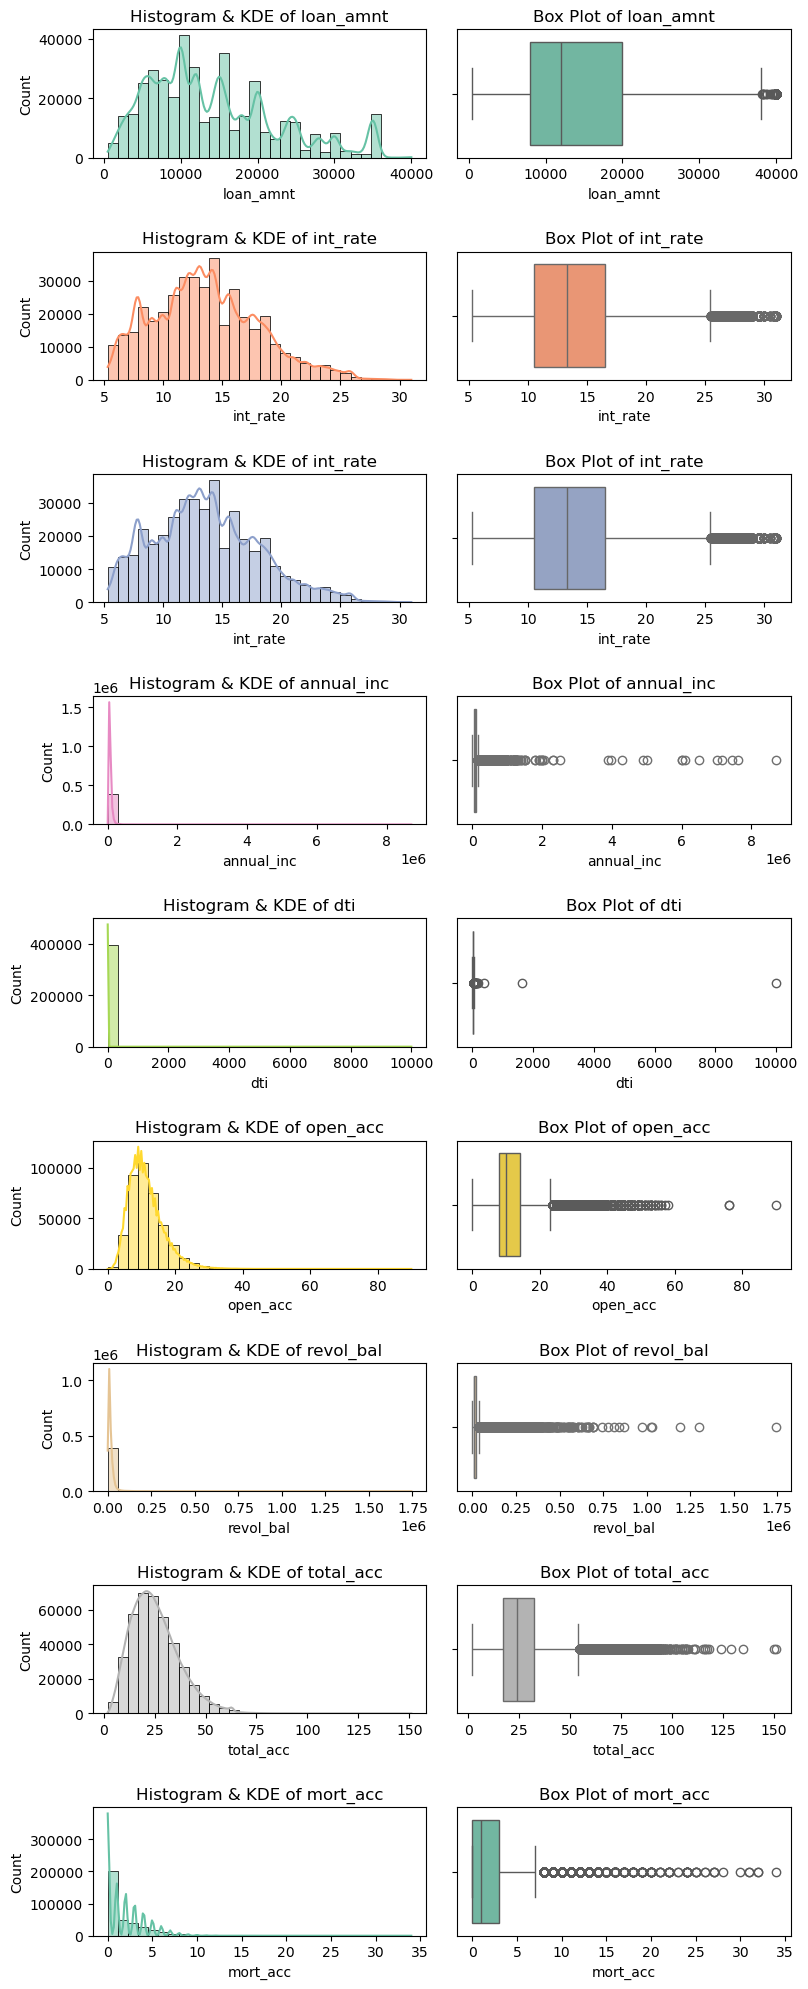

In [297]:
hist_box_plot(data, cols)

In [303]:
data["revol"]

0         25.0
1         27.0
2         26.0
3         13.0
4         43.0
          ... 
396025    23.0
396026     8.0
396027    23.0
396028    20.0
396029    19.0
Name: total_acc, Length: 396030, dtype: float64